In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_data = pd.read_csv('C:/Users/91761/Desktop/csv1/gld_price_data.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
gold_data.shape

(2290, 6)

In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
#checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
#getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
#correlation
  #1.positive correlation   2.negative correlation
correlation = gold_data.corr()

<AxesSubplot:>

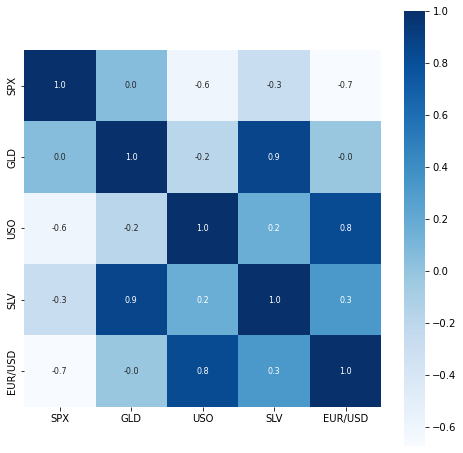

In [8]:
#constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar=True,square = True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [9]:
#correlation values of gld
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\91761\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

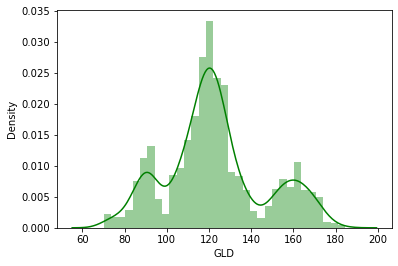

In [10]:
#checking the distribution of the GLD
sns.distplot(gold_data["GLD"],color='green')

In [11]:
#splitting the features and target
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [12]:
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [13]:
Y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

In [14]:
#splitting into training data and test data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [15]:
#model training 
 #Random Forest Regressor
    
regressor = RandomForestRegressor(n_estimators=100)

In [16]:
#training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [17]:
#model evaluation
  #prediction on test data

test_data_prediction = regressor.predict(x_test)

In [18]:
test_data_prediction

array([168.67509906,  81.79420004, 116.32330052, 127.57640102,
       120.70080133, 154.67589825, 150.38459878, 126.17940041,
       117.57579892, 126.06530047, 117.09100054, 171.75850082,
       142.13939835, 167.31969847, 115.22550034, 117.65280037,
       138.92940355, 170.2712008 , 159.66680307, 159.98310015,
       155.22360024, 125.22329989, 176.01169932, 157.03960389,
       125.11580058,  93.87049957,  77.61089962, 120.56259986,
       119.12079948, 167.57079957,  88.23170065, 124.9648999 ,
        91.26690056, 117.85729972, 121.19049933, 136.4904003 ,
       115.31180154, 115.23860102, 148.46689939, 107.30050089,
       104.82610255,  87.11019786, 126.59880046, 117.70150028,
       152.61119892, 119.39689997, 108.33370022, 108.13219841,
        93.23490071, 127.24209739,  74.97600041, 113.71449939,
       121.29850026, 111.23699907, 118.99919876, 120.81219904,
       159.43430018, 168.52190127, 147.0408969 ,  85.82569854,
        94.28120047,  86.81559877,  90.50119982, 119.00

In [19]:
#R squared error
error_score = metrics.r2_score(y_test,test_data_prediction)

In [20]:
print("R squared error:",error_score)

R squared error: 0.9892149580054184


In [21]:
#compare the actual values and predicted values in a plot

y_test = list(y_test)

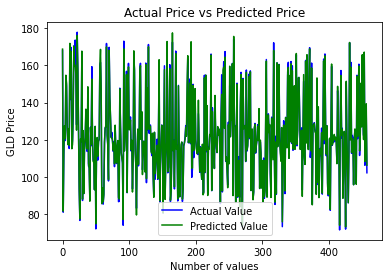

In [22]:
plt.plot(y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label="Predicted Value")
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Number of values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()

In [23]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB
